### Geely Auto Assignment

Problem Statement
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of car prices. You will need to submit a Jupyter notebook for the same. 

 

Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

 


In [3]:
# importing necessary Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      


Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

Since problem statement says we need consider only company name not model names for the analysis, We will split the CarName into two parts

1. Company_Name
2. Model_Name

And will just include Company_name in the df and drop all others.

In [9]:
Company_Name = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"Company_Name",Company_Name)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,Company_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.Company_Name

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

In [13]:
#Since there are lot of repetatives, we will check only the unique ones 

df.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

It seems are that there are errors in company column. mazda named as maxda, Nissan and nissan, porsche as porcshce, volkswagen as vokswagen and vw, toyota as toyuta

In [17]:
df.Company_Name.replace('maxda','mazda',inplace=True)
df.Company_Name.replace('vokswagen','volkswagen',inplace=True)
df.Company_Name.replace('vw','volkswagen',inplace=True)
df.Company_Name.replace('porcshce','porsche',inplace=True)
df.Company_Name.replace('toyouta','toyota',inplace=True)

df.Company_Name = df.Company_Name.str.lower()

df.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
df.columns

Index(['car_ID', 'symboling', 'Company_Name', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

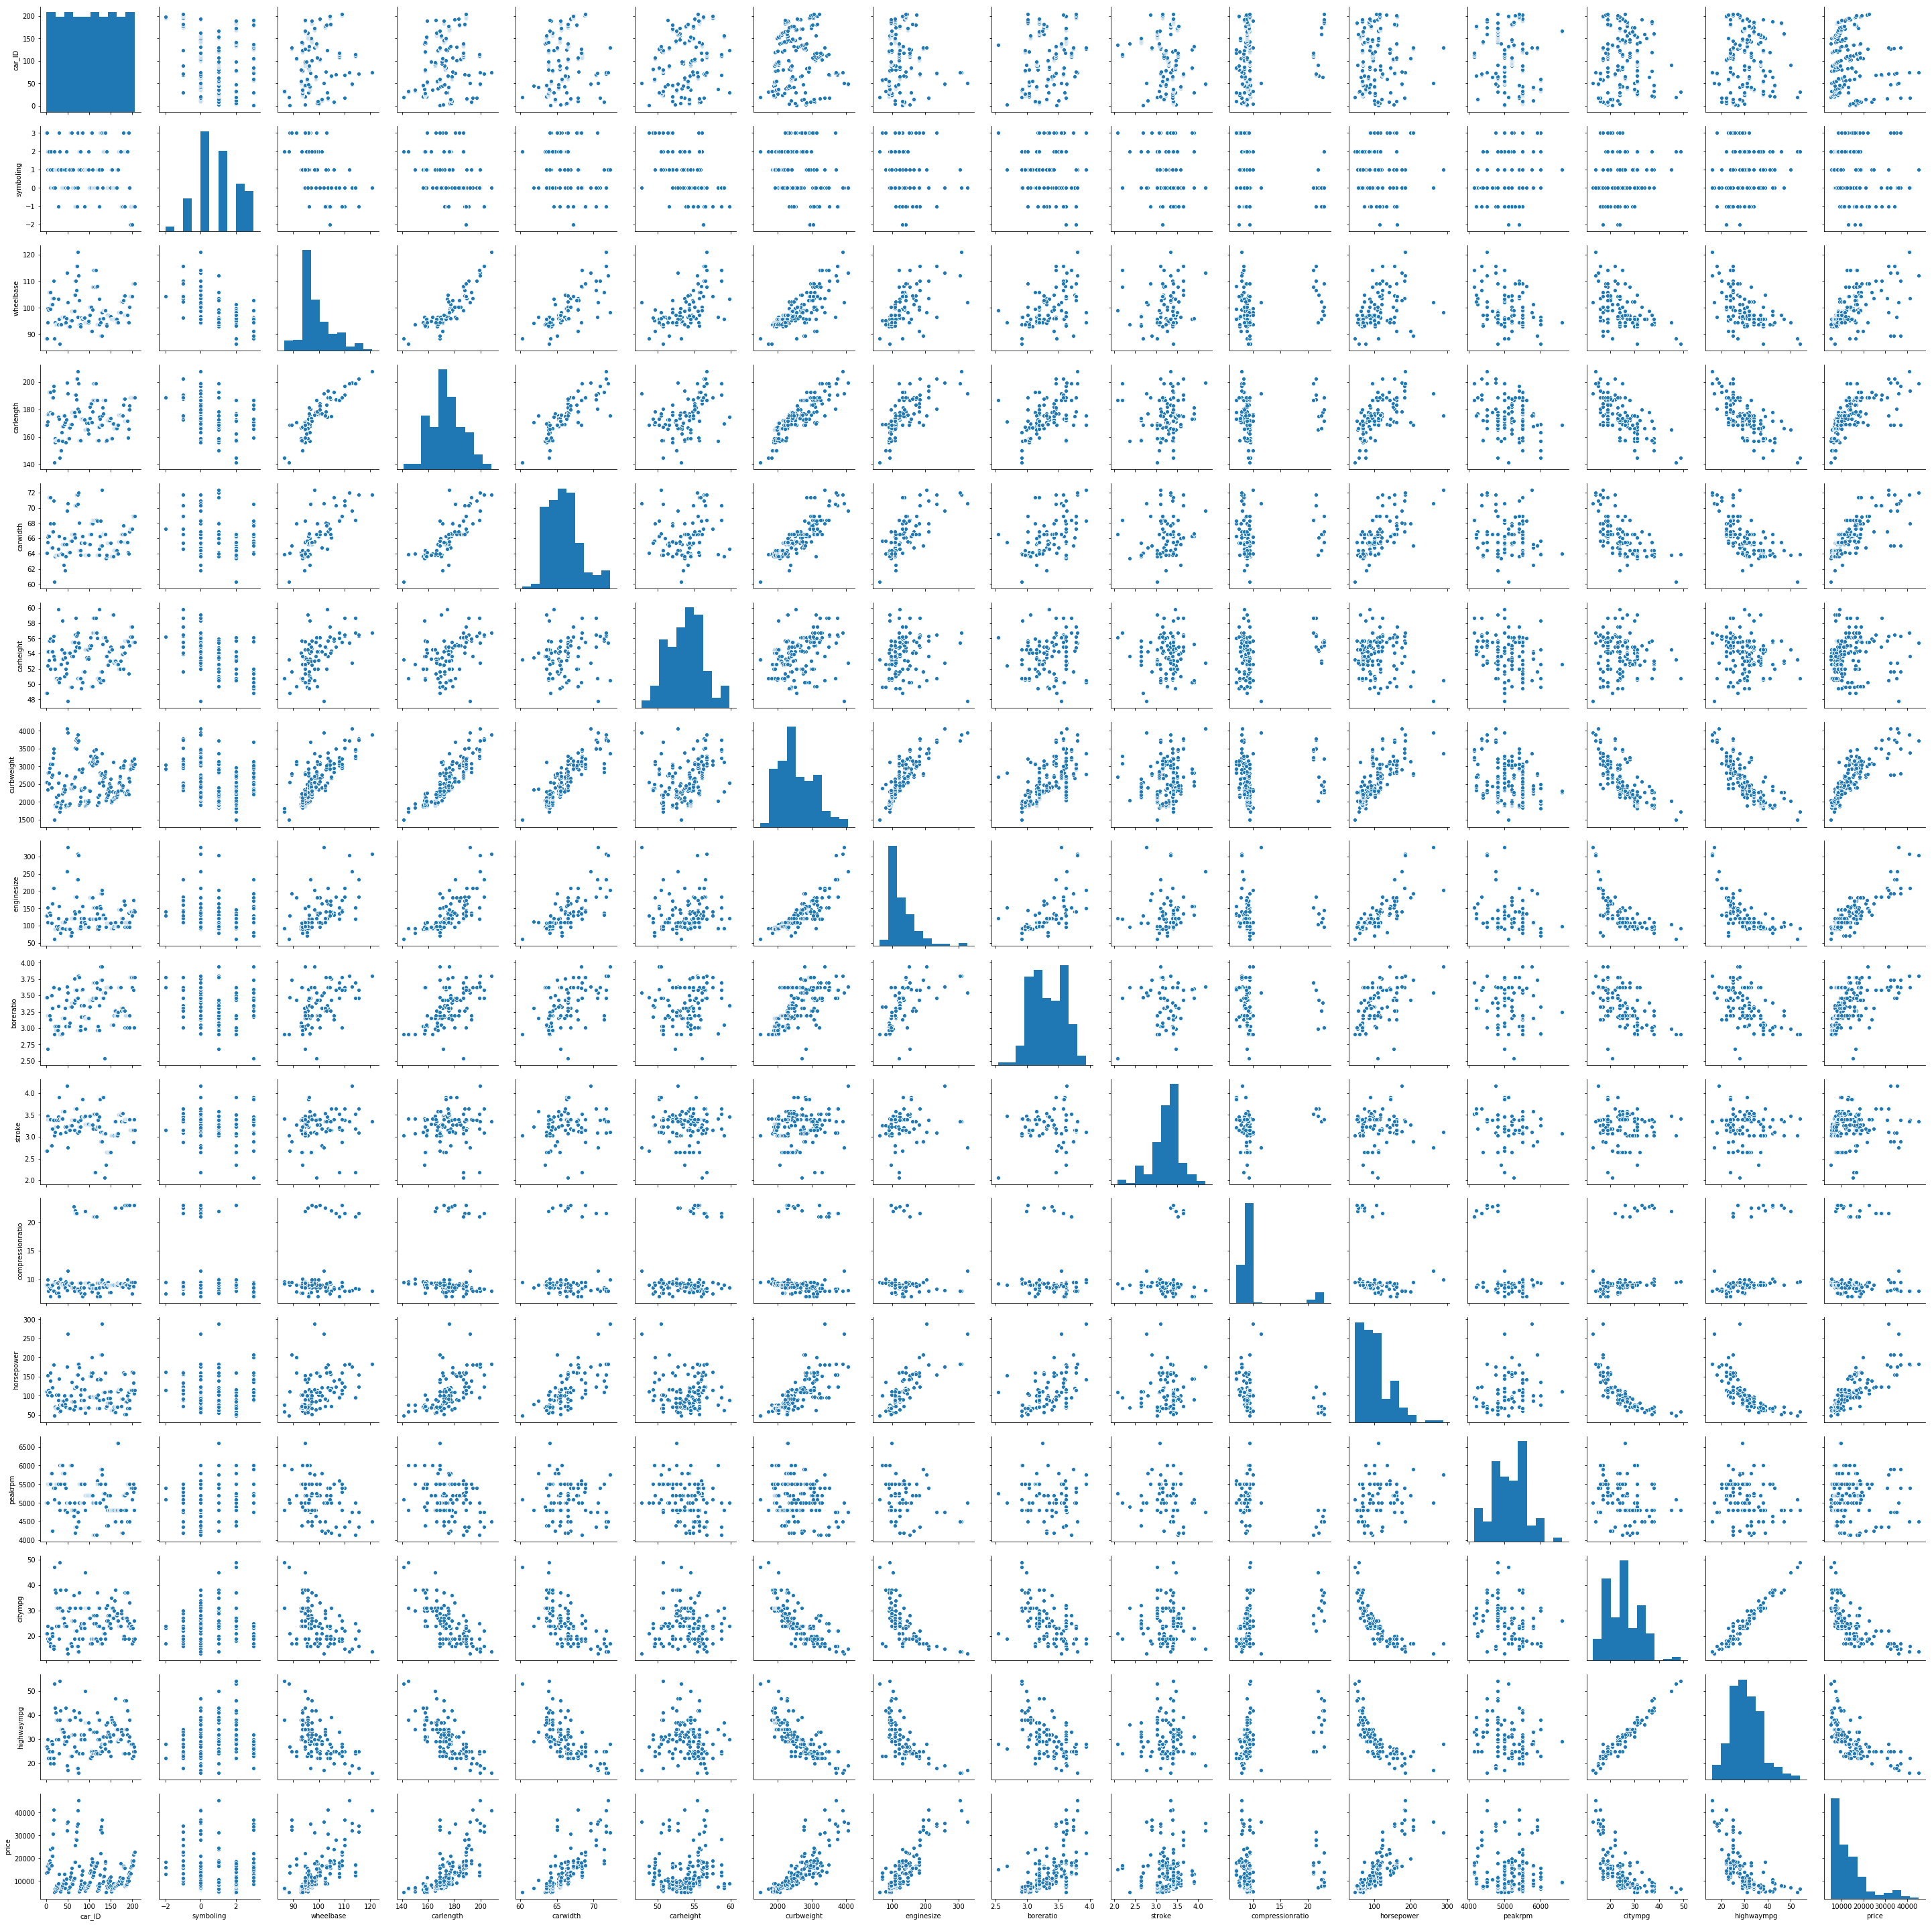

In [21]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df)
plt.show()

As there are too many variables, We need to understand the data first and eliminate few columns which  doesn't impact the dependent Variable 

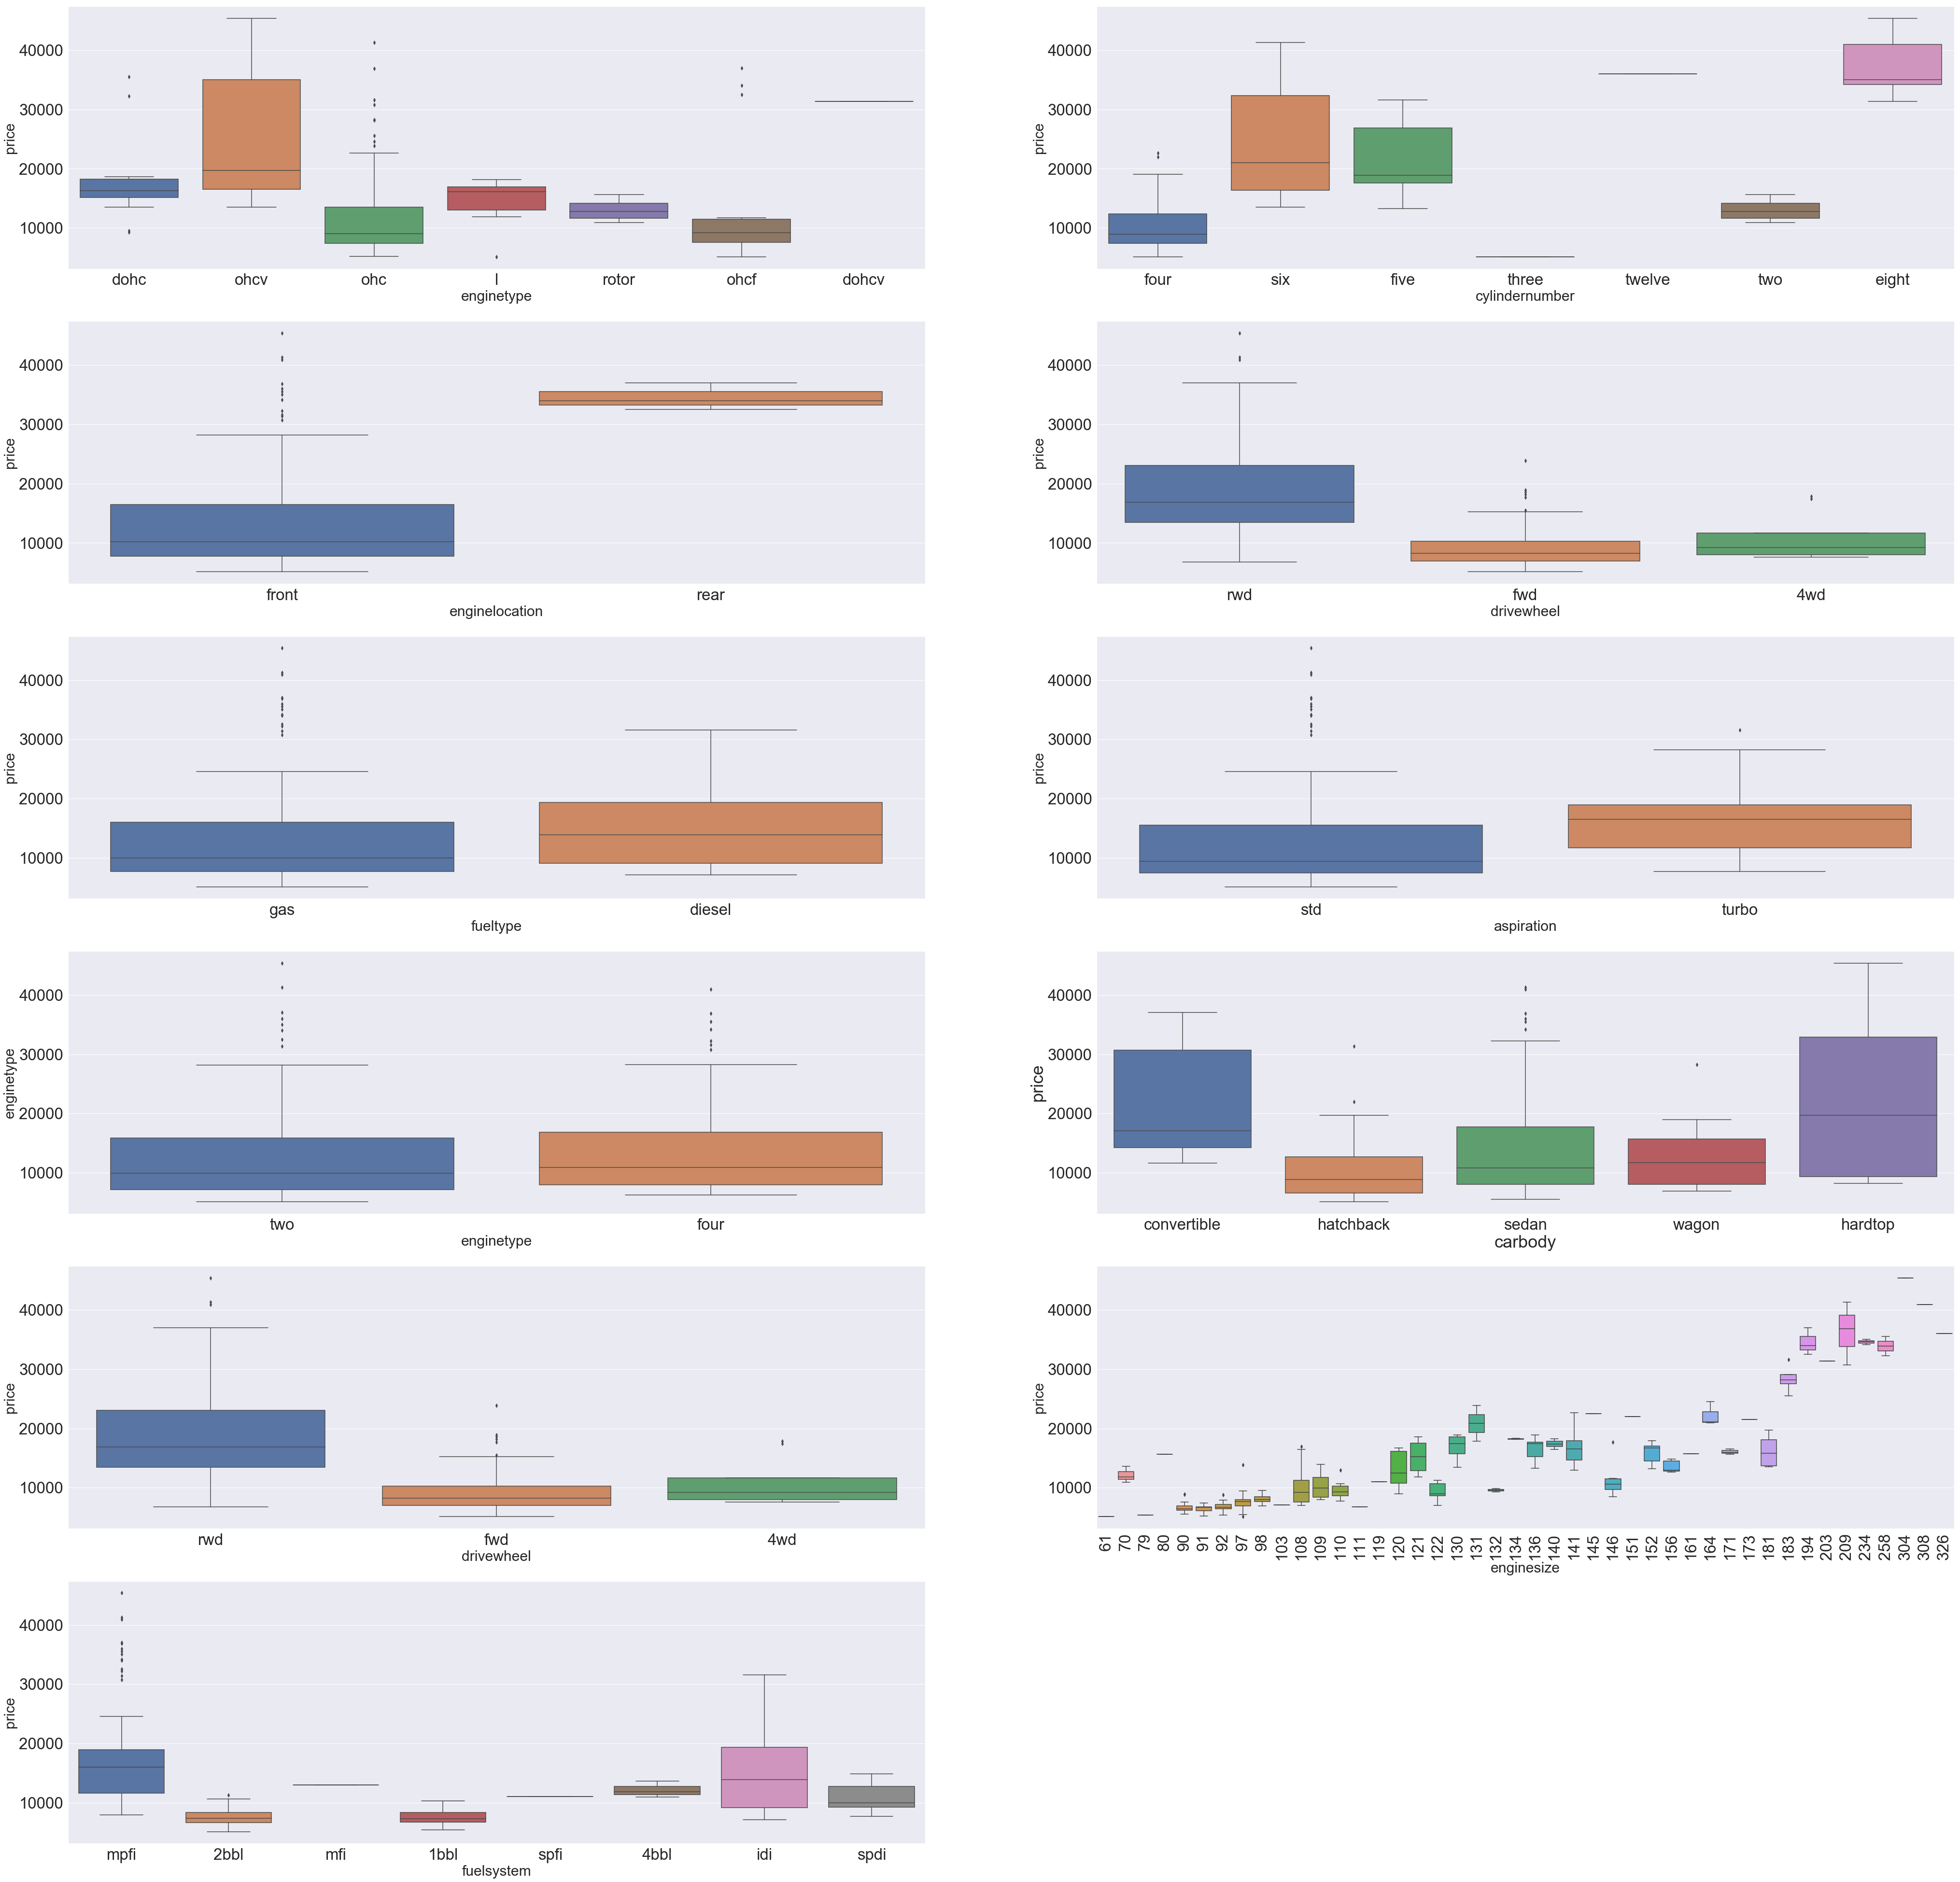

In [41]:
sns.set(font_scale=3) 
plt.figure(figsize=(70, 70))
plt.subplot(6,2,1)
b=sns.boxplot(x = 'enginetype', y = 'price', data = df)
b.set_xlabel("enginetype",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,2)
b=sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
b.set_xlabel("cylindernumber",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,3)
b=sns.boxplot(x = 'enginelocation', y = 'price', data = df)
b.set_xlabel("enginelocation",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,4)
b=sns.boxplot(x = 'drivewheel', y = 'price', data = df)
b.set_xlabel("drivewheel",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,5)
b=sns.boxplot(x = 'fueltype', y = 'price', data = df)
b.set_xlabel("fueltype",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,6)
b=sns.boxplot(x = 'aspiration', y = 'price', data = df)
b.set_xlabel("aspiration",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,7)
b=sns.boxplot(x = 'doornumber', y = 'price', data = df)
b.set_xlabel("doornumber",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,8)
b.set_xlabel("enginetype",fontsize=30)
b.set_ylabel("enginetype",fontsize=30)
b=sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(6,2,9)
b=sns.boxplot(x = 'drivewheel', y = 'price', data = df)

b.set_xlabel("drivewheel",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,10)
b= sns.boxplot(x = 'enginesize', y = 'price', data = df)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.set_xlabel("enginesize",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.subplot(6,2,11)
b=sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
b.set_xlabel("fuelsystem",fontsize=30)
b.set_ylabel("price",fontsize=30)
plt.show()





# Inferences

1. prices are high for ohcv engitype and ohc is less costly compared to all other engine type.
2. rear engines cost higher
3. mpfi and idi fuel systems are costiler
4. it is clear from the graph, higher the engine size - higher is the price
5. rear drive wheel is costiler compared to other drive wheels.
6. it seems like engine type doesnt affect the price of the car
7. convertible and hard top costs higher than there peers.
8. diesel engines are costlier compared to gas engines.

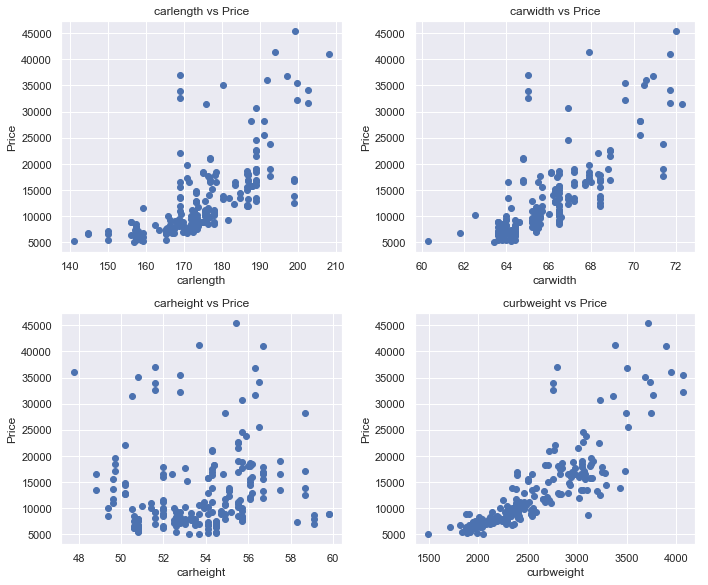

In [43]:
sns.set(font_scale=1) 
def scatterplt(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatterplt('carlength', 1)
scatterplt('carwidth', 2)
scatterplt('carheight', 3)
scatterplt('curbweight', 4)

plt.tight_layout()

it seems that carheight dosent affect prices that much.

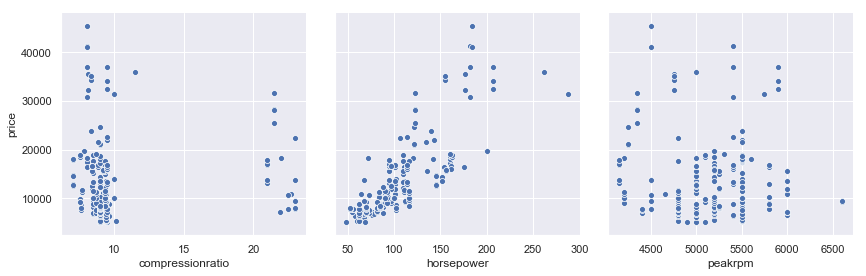

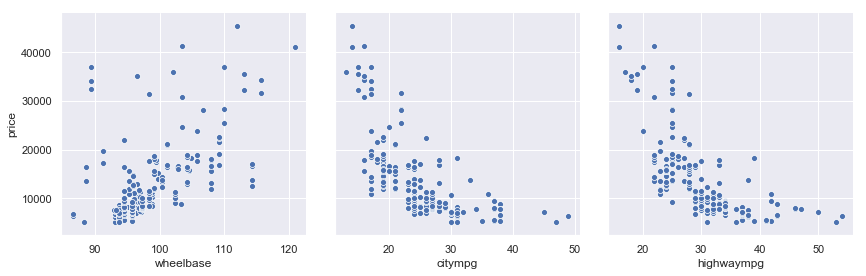

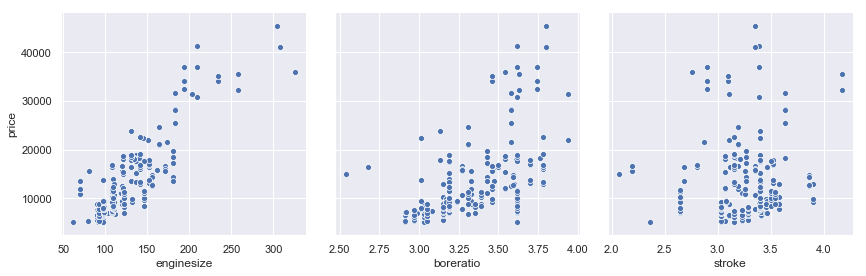

In [46]:
def pair(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()
pair('compressionratio', 'horsepower', 'peakrpm')
pair('wheelbase', 'citympg', 'highwaympg')
pair('enginesize', 'boreratio', 'stroke')


It seems that except peak rpm and compression ratio, all other affect prices linearly either by increasing or decreasing.


In [47]:
print(df.citympg.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
85%       31.000000
90%       31.600000
100%      49.000000
max       49.000000
Name: citympg, dtype: float64


In [49]:
np.corrcoef(df['citympg'], df['price'])[0,1]

-0.6857513360270401

In [50]:
np.corrcoef(df['highwaympg'], df['price'])[0,1]

-0.6975990916465566

it seems that mileage is negatively correlated with prices. Higher the mileage , lower the prices.

In [165]:
df_segregated = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                     'carlength','carwidth','doornumber', 'enginelocation','highwaympg', 'peakrpm', 'citympg', 'compressionratio', 'stroke']]
df_segregated.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,horsepower,carlength,carwidth,doornumber,enginelocation,highwaympg,peakrpm,citympg,compressionratio,stroke
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,111,168.8,64.1,two,front,27,5000,21,9.0,2.68
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,111,168.8,64.1,two,front,27,5000,21,9.0,2.68
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,...,154,171.2,65.5,two,front,26,5000,19,9.0,3.47
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,...,102,176.6,66.2,four,front,30,5500,24,10.0,3.40
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,...,115,176.6,66.4,four,front,22,5500,18,8.0,3.40


### Creating dummies for categorical variables

In [182]:
# Defining the map function
def getDummies(categoricalVariables,df):
    for column in categoricalVariables:
        temp = pd.get_dummies(df[column], drop_first = True)
        df = pd.concat([df, temp], axis = 1)
        df.drop([column], axis = 1, inplace = True)
    
    return df
# Applying the function to the cars_lr
df_normalised = getDummies(['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','doornumber','enginelocation'],df_segregated)
print(df_normalised.shape)
df_normalised.head()

(205, 35)


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,highwaympg,peakrpm,...,ohcv,rotor,five,four,six,three,twelve,two,two,rear
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,27,5000,...,0,0,0,1,0,0,0,0,1,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,27,5000,...,0,0,0,1,0,0,0,0,1,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,26,5000,...,1,0,0,0,1,0,0,0,1,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,30,5500,...,0,0,0,1,0,0,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,22,5500,...,0,0,1,0,0,0,0,0,0,0


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
df_train, df_test = train_test_split(df_normalised, train_size = 0.7, test_size = 0.3, random_state = 100)



scaler = MinMaxScaler()
numericalVariables = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[numericalVariables] = scaler.fit_transform(df_train[numericalVariables])

df_train.head()

y_train = df_train.pop('price')
X_train = df_train


In [168]:
df_train.describe()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,highwaympg,peakrpm,citympg,...,ohcv,rotor,five,four,six,three,twelve,two,two,rear
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.374976,0.400029,0.344211,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.440559,0.006993
std,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.188477,0.196438,0.186165,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.498199,0.083624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,0.216216,0.265306,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,0.378378,0.428571,0.333333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,0.527027,0.551020,0.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


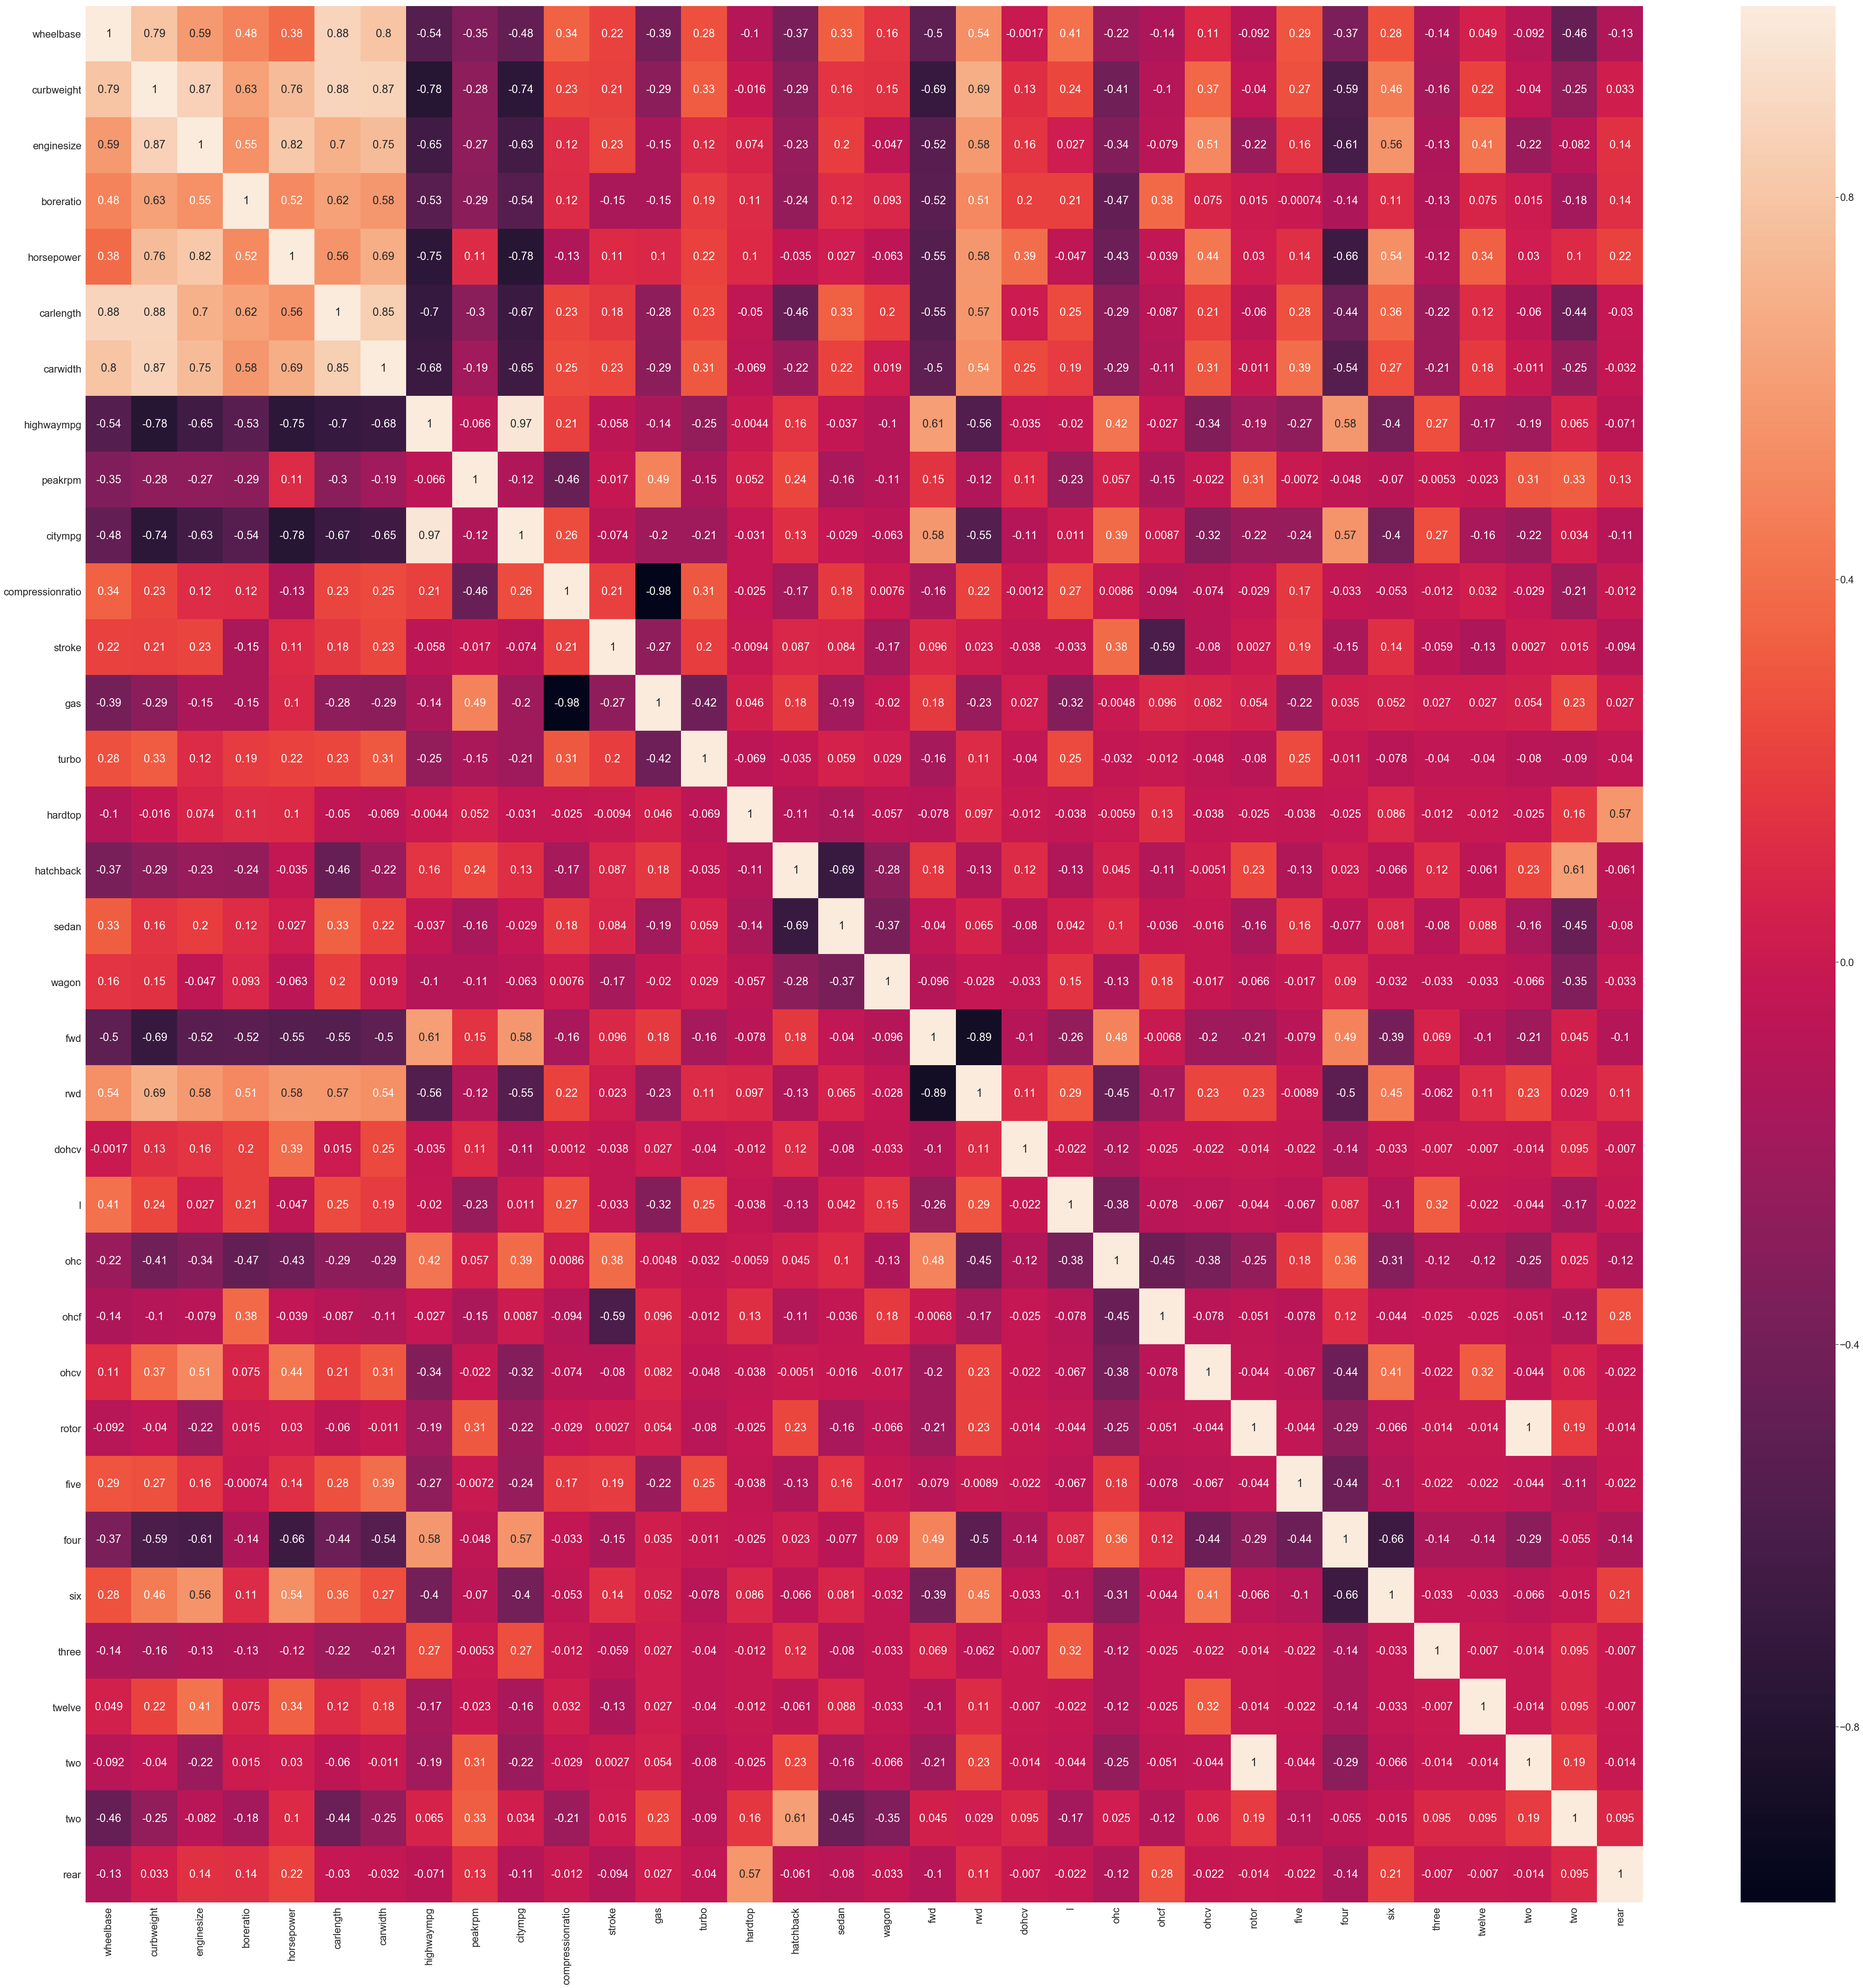

In [205]:
#Correlation using heatmap
sns.set(font_scale=2) 
plt.figure(figsize = (75, 75))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

Lets see the heat map and find out positive correlation and negative correlation with price.

### positive correlation

rear= 0.23
tweleve= 0.25
six= 0.5
five= 0.27
ohcv=0.34
horsepower = 0.8
engineSize=0.87
curbweight=0.86
carwidth=0.86
carlength=0.72
wheeldrive= 0.82

it seems  horsepower, enginesize , curbweight, carwidth, carlength, wheeldrive is highly positively correlated. Hence price increases

### negative correlation

four= 0.7
fwd = 0.6
highwaympg= 0.69
citympg=0.67

As we know... highmpg, citympg, fwd, four are negatively correlated and decreases the prices.

In [206]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 11),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', False, 3),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('highwaympg', False, 14),
 ('peakrpm', False, 8),
 ('citympg', False, 10),
 ('compressionratio', False, 6),
 ('stroke', True, 1),
 ('gas', False, 21),
 ('turbo', False, 19),
 ('hardtop', False, 13),
 ('hatchback', False, 12),
 ('sedan', False, 16),
 ('wagon', False, 15),
 ('fwd', False, 18),
 ('rwd', False, 25),
 ('dohcv', False, 5),
 ('l', False, 20),
 ('ohc', False, 4),
 ('ohcf', False, 17),
 ('ohcv', True, 1),
 ('rotor', False, 2),
 ('five', False, 23),
 ('four', False, 7),
 ('six', False, 24),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('two', False, 22),
 ('rear', True, 1)]

In [207]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'boreratio', 'carwidth', 'stroke', 'ohcv',
       'three', 'twelve', 'two', 'rear'],
      dtype='object')

In [208]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,boreratio,carwidth,stroke,ohcv,three,twelve,two,two,rear
122,0.272692,0.139623,0.230159,0.291667,0.525253,0,0,0,0,0,0
125,0.500388,0.339623,1.000000,0.666667,0.464646,0,0,0,0,1,0
166,0.314973,0.139623,0.444444,0.308333,0.449495,0,0,0,0,1,0
1,0.411171,0.260377,0.626984,0.316667,0.247475,0,0,0,0,1,0
199,0.647401,0.260377,0.746032,0.575000,0.484848,0,0,0,0,0,0


In [209]:
# functions to build model and checkmodel

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [143]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           2.88e-58
Time:                        03:00:39   Log-Likelihood:                 177.46
No. Observations:                 143   AIC:                            -330.9
Df Residuals:                     131   BIC:                            -295.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0428      0.035     -1.233      0.2

In [210]:
 X_train_new = X_train_rfe.drop(["two"], axis = 1)

In [116]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     93.08
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           5.48e-53
Time:                        02:35:14   Log-Likelihood:                 159.07
No. Observations:                 143   AIC:                            -298.1
Df Residuals:                     133   BIC:                            -268.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0654      0.037     -1.779      0.0

In [190]:
checkVIF(X_train_new)

,Features,VIF
0,curbweight,38.12
3,carwidth,31.93
1,enginesize,22.36
2,boreratio,10.12
4,stroke,7.35
5,ohcv,1.69
7,twelve,1.46
8,rear,1.15
6,three,1.04


In [211]:

X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [194]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     97.95
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           3.58e-52
Time:                        03:25:08   Log-Likelihood:                 154.51
No. Observations:                 143   AIC:                            -291.0
Df Residuals:                     134   BIC:                            -264.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.038     -1.934      0.0

In [195]:
checkVIF(X_train_new)

,Features,VIF
0,const,28.24
1,enginesize,4.87
3,carwidth,2.97
2,boreratio,2.31
5,ohcv,1.72
4,stroke,1.64
7,twelve,1.47
8,rear,1.14
6,three,1.05


Removing three  did not affect VIF and P-Value.  But there was reduction in r squared value.

### Residual Analysis of the model

In [213]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)



Text(0.5, 0, 'Errors')

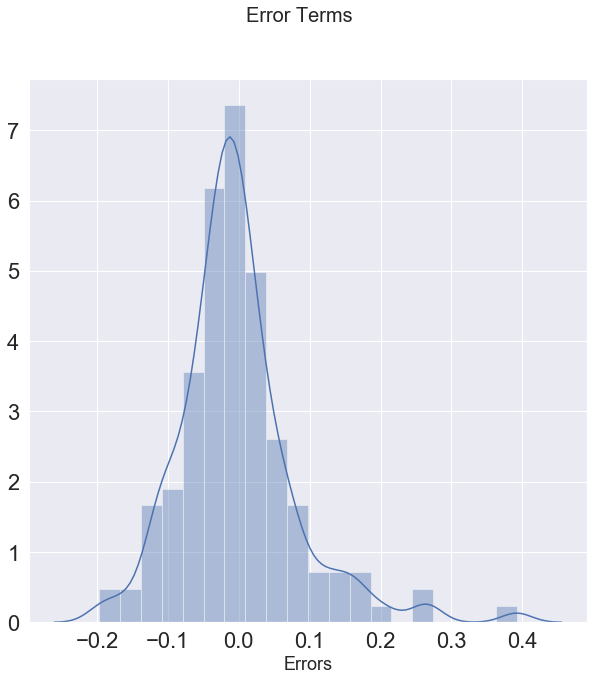

In [214]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Prediction and evaluation

In [216]:
#Scaling the test set
numericalVariables = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_test[numericalVariables] = scaler.fit_transform(df_test[numericalVariables])

#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test
df_test.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,highwaympg,peakrpm,citympg,...,ohcv,rotor,five,four,six,three,twelve,two,two,rear
160,0.265306,0.132148,0.082969,0.515873,0.116129,0.341732,0.200000,1.000000,0.265306,1.000000,...,0,0,0,1,0,0,0,0,0,0
186,0.311953,0.219125,0.131004,0.515873,0.212903,0.426772,0.315789,0.580645,0.448980,0.541667,...,0,0,0,1,0,0,0,0,0,0
59,0.355685,0.271985,0.187773,0.674603,0.206452,0.522835,0.421053,0.516129,0.265306,0.500000,...,0,0,0,1,0,0,0,0,1,0
165,0.230321,0.214320,0.082969,0.555556,0.387097,0.379528,0.157895,0.419355,1.000000,0.500000,...,0,0,0,1,0,0,0,0,1,0
140,0.195335,0.202307,0.126638,0.857143,0.135484,0.200000,0.136842,0.483871,0.102041,0.500000,...,0,0,0,1,0,0,0,0,1,0


In [180]:
X_train_new.head()

,enginesize,boreratio,carwidth,stroke,ohcv,three,twelve,rear
122,0.139623,0.230159,0.291667,0.525253,0,0,0,0
125,0.339623,1.000000,0.666667,0.464646,0,0,0,0
166,0.139623,0.444444,0.308333,0.449495,0,0,0,0
1,0.260377,0.626984,0.316667,0.247475,0,0,0,0
199,0.260377,0.746032,0.575000,0.484848,0,0,0,0


In [202]:
# Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,enginesize,boreratio,carwidth,stroke,ohcv,three,twelve,rear
160,0.082969,0.515873,0.200000,0.524590,0,0,0,0
186,0.131004,0.515873,0.315789,0.726776,0,0,0,0
59,0.187773,0.674603,0.421053,0.721311,0,0,0,0
165,0.082969,0.555556,0.157895,0.551913,0,0,0,0
140,0.126638,0.857143,0.136842,0.311475,0,0,0,0


In [217]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [218]:
#Comparing y_test and y_pred
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5410822854964531

Text(0, 0.5, 'y_pred')

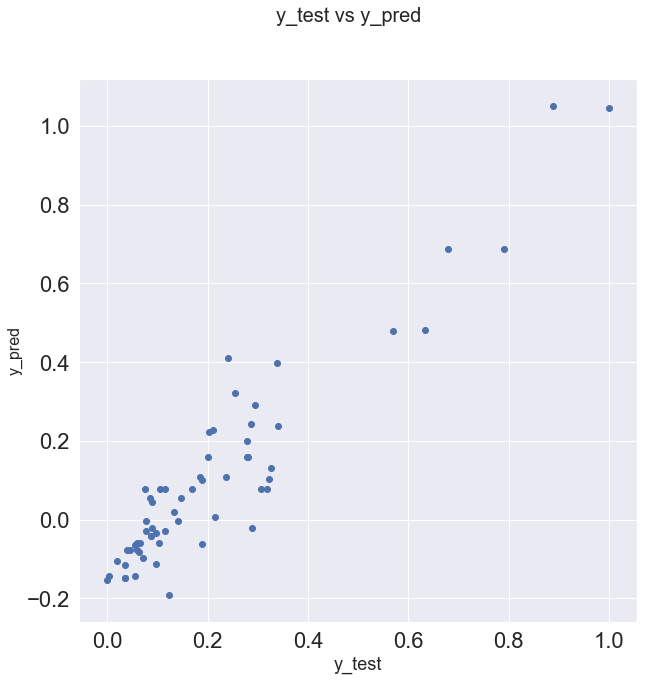

In [219]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [220]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.38e-72
Time:                        03:38:46   Log-Likelihood:                 152.54
No. Observations:                 143   AIC:                            -289.1
Df Residuals:                     135   BIC:                            -265.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
enginesize     1.1748      0.091     12.910      0.0

# Output

R2 and adjusted r2 is 92%. This states that model is stable.
F-stats and Prob(F-stats) (overall model fit) is 212 and 1.38e-72.
